# Đọc và xử lý dữ liệu trên HDFS 

Sau khi đã đưa dữ liệu vào lưu trữ ở HDFS, thì ta sẽ tiến hành lấy dữ liệu ở trên HDFS và tiến hành thự hiện thống kê và vẽ biểu đồ. Ta tạo một cụm spark gồm có 1 node master và 2 node worker, để biết thêm thông tin chi tiết về cụm và các chương trình đang chạy thì ta truy cập tại  http://localhost:8080/


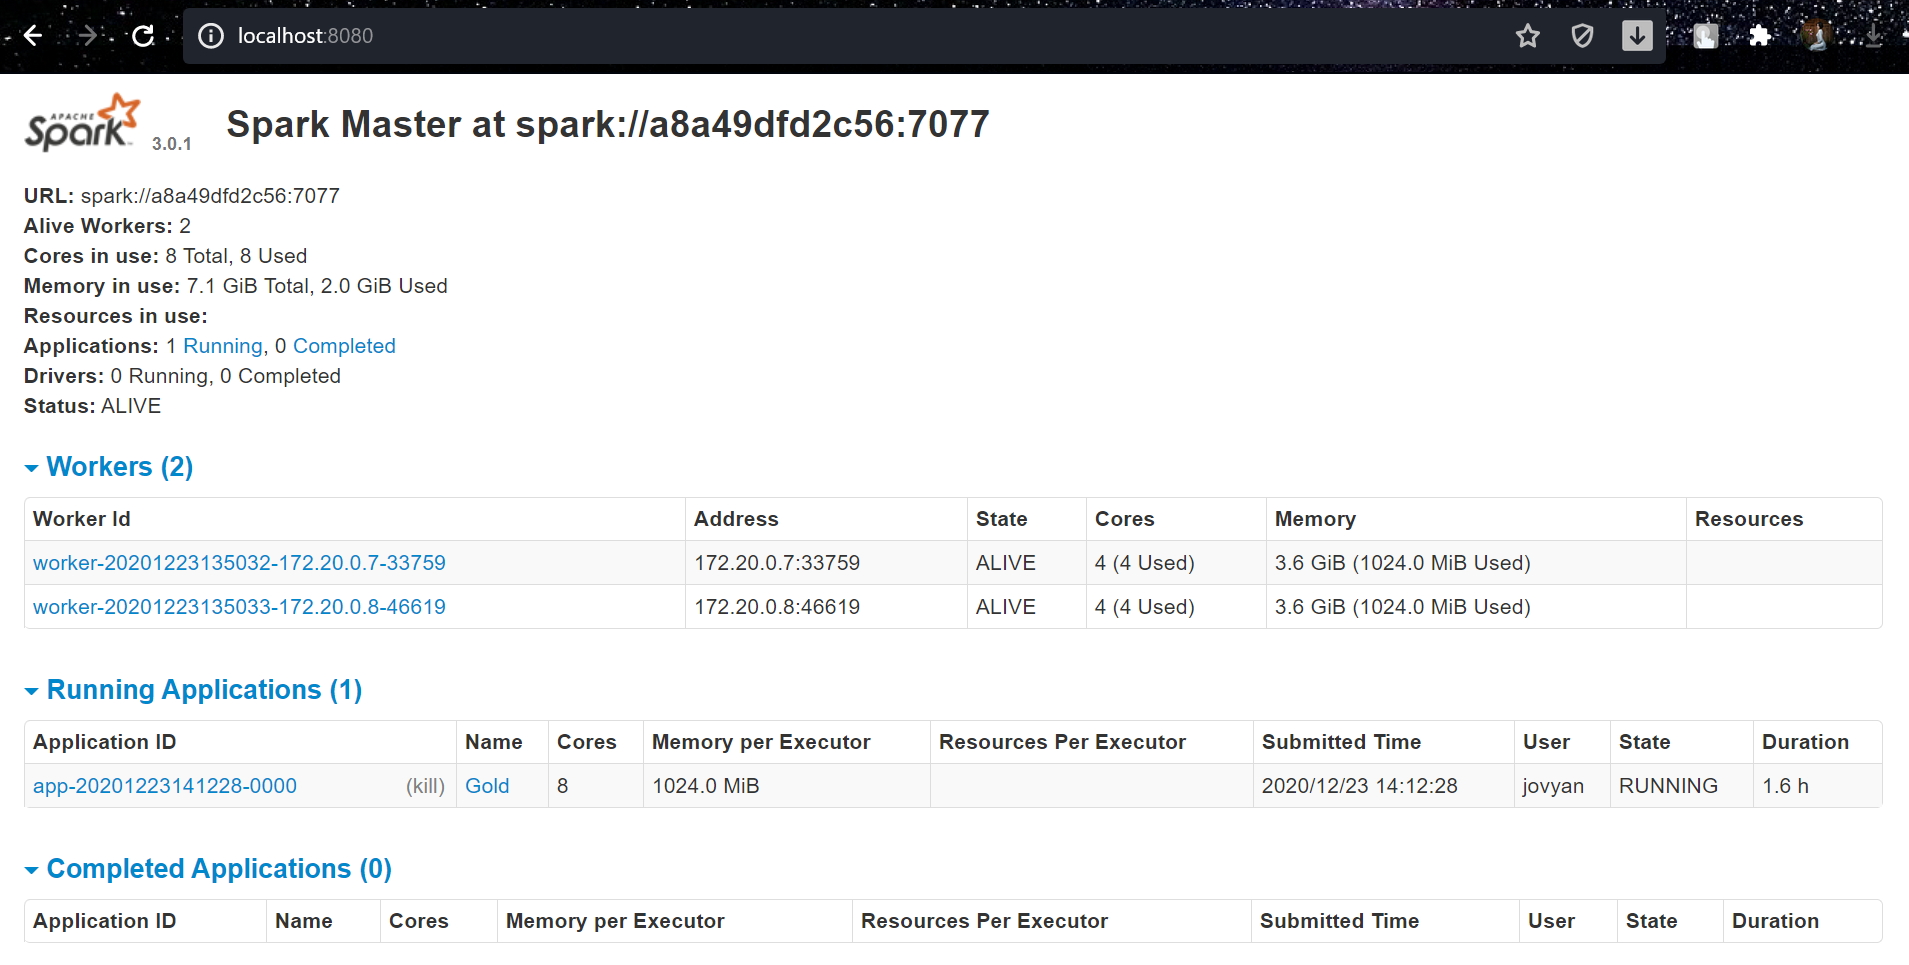

In [1]:
from IPython.display import Image
Image("./image/spark_master.png")

In [2]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession

- Tìm địa chỉ của spark-master bằng cách thực hiện lệnh sau tại CMD:
    * docker inspect -f "{{range .NetworkSettings.Networks}}{{.IPAddress}}{{end}}" spark-master
- Sau đó truy cập vào master của cụm tại địa chỉ đã tìm ở trên với tên chương trình là "Gold"
- Tạo SparkSession để truy cập vào HDFS để đọc dữ liệu và xử lý.

In [3]:
spark = SparkSession.builder.master("spark://172.20.0.7:7077").appName("Gold").getOrCreate()

- Đọc dữ liệu ở namenode có địa chỉ trên hdfs là namenode:9000
- Lấy dữ liệu dataframe từ spark tại file gold.csv

In [4]:
csvFile = spark.read.format("csv")\
.option("header", "true")\
.option("inferSchema", "true")\
.load("hdfs://namenode:9000/gold/gold.csv")


In [5]:
#Lấy thông tin Schema
csvFile.printSchema()

root
 |-- Date: string (nullable = true)
 |-- US_dollar: double (nullable = true)
 |-- Euro: double (nullable = true)
 |-- Japanese_yen: double (nullable = true)
 |-- Vietnamese_dong: double (nullable = true)
 |-- Korean_won: double (nullable = true)



In [6]:
#Trả về số record
csvFile.count()

10941

In [7]:
#In ra record
csvFile.show()

+----------+---------+-----+------------+---------------+----------+
|      Date|US_dollar| Euro|Japanese_yen|Vietnamese_dong|Korean_won|
+----------+---------+-----+------------+---------------+----------+
|1978-12-29|    226.0|137.1|         0.0|            0.0|       0.0|
|1979-01-01|    226.0|137.1|         0.0|            0.0|       0.0|
|1979-01-02|    226.8|137.3|     43164.9|            0.0|  107470.0|
|1979-01-03|    218.6|134.0|     43717.9|            0.0|  108027.4|
|1979-01-04|    223.2|136.8|     43674.9|            0.0|  108602.5|
|1979-01-05|    225.5|138.4|     44582.5|            0.0|  110510.4|
|1979-01-08|    223.1|136.4|     44436.2|            0.0|  110356.3|
|1979-01-09|    224.0|137.3|     44045.6|            0.0|  109248.4|
|1979-01-10|    220.7|135.5|     43366.4|            0.0|  108108.3|
|1979-01-11|    220.7|135.9|     43770.6|            0.0|  108771.7|
|1979-01-12|    217.6|134.1|     42837.1|            0.0|  106856.6|
|1979-01-15|    216.9|133.8|     4

In [8]:
#Chuyển dữ liệu dataframes sang dạng pandas
df = csvFile.toPandas()

Ta sử dụng một thư viện phổ biến nhất trong Python là Matplotlib để vẽ biểu đồ. 
Ta sẽ vẽ biểu đồ biểu diễn giá vàng tại Mỹ tính từ 29-12-1978 đến 4-12-2020

Text(0.5, 1.0, 'Giá vàng tại Mỹ')

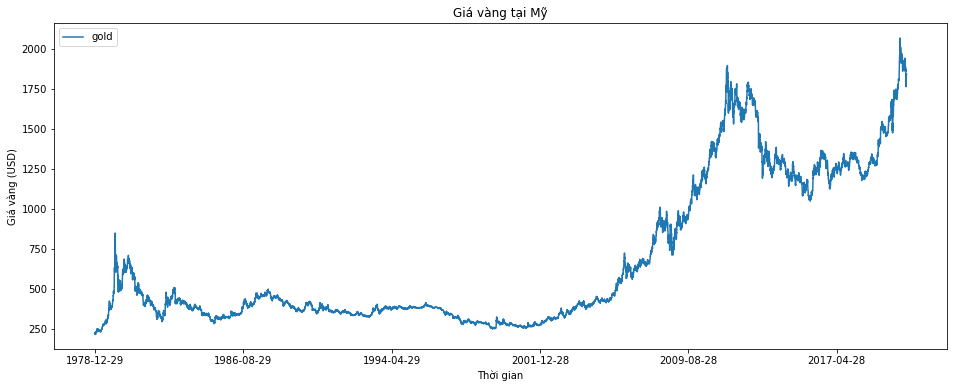

In [9]:
import matplotlib.pyplot as plt

df.plot(x='Date', y= 'US_dollar', label='gold', figsize=(16,6))
plt.ylabel('Giá vàng (USD)')
plt.xlabel('Thời gian')
plt.title('Giá vàng tại Mỹ')

Biểu đồ giá vàng tại Việt Nam

Text(0.5, 1.0, 'Giá vàng tại Việt Nam')

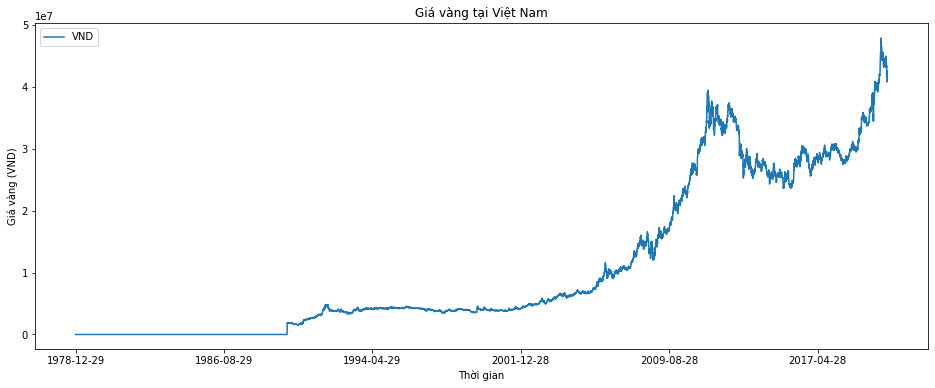

In [10]:
df.plot(x='Date', y= 'Vietnamese_dong', label='VND', figsize=(16,6))
plt.ylabel('Giá vàng (VND)')
plt.xlabel('Thời gian')
plt.title('Giá vàng tại Việt Nam')

Giá vàng tại Mỹ và Châu Âu tính theo USD và Euro . 2 đường của biểu đồ có hình đáng tương đối giống nhau

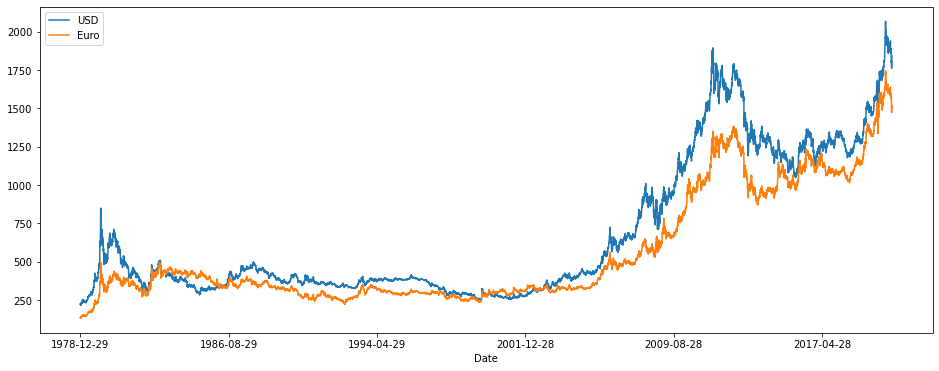

In [11]:
ax = df.plot(x='Date', y= 'US_dollar', label='USD', figsize=(16,6))
ax = df.plot(ax=ax, x= 'Date', y= 'Euro',label='Euro')